# Assignment 1

Author: Dipesh Poudel

Roll No: 10

## Q.No 1
Write python programs to implement linear regression using Stochastic GD, Batch GD, and mini-batch GD. Capture time needed to train the predict the models and compare each approach (Use data.csv).

### Importing the required Libaries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

### Gettting the Data

Reading the CSV file into pandas dataframe

In [2]:
df = pd.read_csv('data/data.csv',header=None)
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Assigning first column as $X$(Independent Variable) and second column as $y$(Dependent Variable)  

In [3]:
X = df.iloc[:,0]
y = df.iloc[:,1]

### Plotting the Data

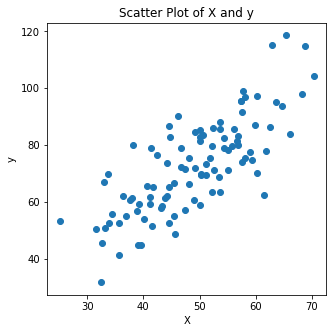

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.title("Scatter Plot of X and y")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

From the scatter plot we can see that the relationship between $X$ and $y$ is linear.

### Batch Gradient Descent

In batch gradient descent we update the parameters(weights) once per epoch 

#### Training the Model

In [5]:
## %%timeit
w0 = 0 
w1 = 0
lr = 0.0001
epochs = 1000
n=float(len(X))
for i in range(epochs):
    y_pred = w0+w1*X
    delw0 = (-2/n)*sum(y-y_pred)
    delw1 = (-2/n)*sum(X*(y-y_pred))
    w0=w0-lr*delw0
    w1=w1-lr*delw1
    if i%100==0:
        print(f"Iteration {i}\n w0 = {w0}\tw1 = {w1}")

Iteration 0
 w0 = 0.014547010110737297	w1 = 0.7370702973591055
Iteration 100
 w0 = 0.03513502002912928	w1 = 1.4788015372774521
Iteration 200
 w0 = 0.04113767542736797	w1 = 1.4786835569145387
Iteration 300
 w0 = 0.047135801867800996	w1 = 1.4785656655669113
Iteration 400
 w0 = 0.05312940276749255	w1 = 1.4784478631674083
Iteration 500
 w0 = 0.059118481540928546	w1 = 1.478330149648919
Iteration 600
 w0 = 0.06510304160001894	w1 = 1.4782125249443832
Iteration 700
 w0 = 0.07108308635409932	w1 = 1.4780949889867918
Iteration 800
 w0 = 0.07705861920993279	w1 = 1.4779775417091856
Iteration 900
 w0 = 0.08302964357171239	w1 = 1.4778601830446565


#### Making the Predictions

In [6]:
y_pred = w0+w1*X

#### Plotting the Result

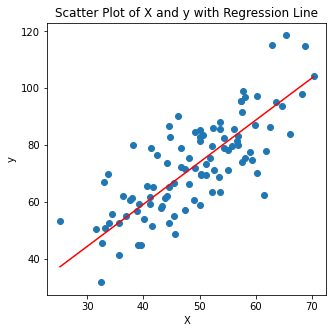

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')
plt.title("Scatter Plot of X and y with Regression Line")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**A function to perform model evaluation**

In [8]:
def model_evaluate(y,y_pred):
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    r2 = metrics.r2_score(y, y_pred)
    print("The model performance")
    print("--------------------------------------")
    print(f'MAE is {mae}')
    print(f'MSE is {mse}')
    print('R2 score is {}'.format(r2))

#### Model Evaluation

In [9]:
model_evaluate(y,y_pred)

The model performance
--------------------------------------
MAE is 8.422711763776555
MSE is 112.6148101161347
R2 score is 0.5900746017527791


The value of R2 is 0.59 which means the model was able to explain 59% variance in dependent variable caused by independent variable

### Stochastic Gradient Descent

In Stochastic Gradient Descent, we update the weights for each data point

In [10]:
##%%timeit
w0 = 0
w1 = 0
lr = 0.0001
epochs = 1000
n=float(len(X))
for i in range(epochs):
    for j in range(len(X)):
        y_pred = w0+w1*X[j]
        delw0 = (-2/n)*(y[j]-y_pred)
        delw1 = (-2/n)*(X[j]*(y[j]-y_pred))
        w0=w0-lr*delw0
        w1=w1-lr*delw1
    if i%100==0:
        print(f"Iteration {i}\n w0 = {w0}\tw1 = {w1}")

Iteration 0
 w0 = 0.011535171934851532	w1 = 0.584587889442503
Iteration 100
 w0 = 0.03523614521353354	w1 = 1.4860346596605525
Iteration 200
 w0 = 0.041235436305053094	w1 = 1.4859166759703657
Iteration 300
 w0 = 0.04723019163675254	w1 = 1.4857987814816669
Iteration 400
 w0 = 0.05322041463788957	w1 = 1.485680976127012
Iteration 500
 w0 = 0.05920610873512941	w1 = 1.4855632598390125
Iteration 600
 w0 = 0.06518727735254774	w1 = 1.48544563255033
Iteration 700
 w0 = 0.07116392391162962	w1 = 1.4853280941936795
Iteration 800
 w0 = 0.0771360518312743	w1 = 1.4852106447018176
Iteration 900
 w0 = 0.08310366452779498	w1 = 1.4850932840075641


In [11]:
y_pred = w0+w1*X

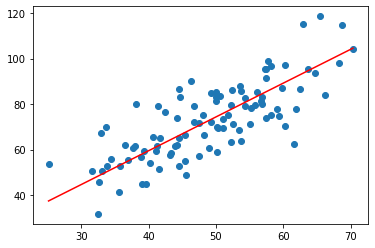

In [12]:
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')
plt.show()

In [13]:
model_evaluate(y,y_pred)

The model performance
--------------------------------------
MAE is 8.453062495891446
MSE is 112.74522422785401
R2 score is 0.5895998857129575


### Mini Batch Gradient Descent

In Mini Batch Gradient descent we create small batches and update weights for each batch 

In [14]:
## %%timeit
w0 = 0
w1 = 0
lr = 0.0001
epochs = 1000
batch_size=10
start=0
end=batch_size
n=float(len(X))
for i in range(epochs):
    X_batch = X[start:end]
    y_batch = y[start:end]
    y_pred = w0+w1*X_batch
    delw0 = (-2/n)*sum(y_batch-y_pred)
    delw1 = (-2/n)*sum(X_batch*(y_batch-y_pred))
    w0=w0-lr*delw0
    w1=w1-lr*delw1
    if i%100==0:
        print(f"Iteration {i}\n w0 = {w0}\tw1 = {w1}")

Iteration 0
 w0 = 0.0013709632886396014	w1 = 0.07067196410837259
Iteration 100
 w0 = 0.026467223749741465	w1 = 1.3567149469196205
Iteration 200
 w0 = 0.026769888160102662	w1 = 1.362977176826608
Iteration 300
 w0 = 0.026951745926235903	w1 = 1.3630041923927687
Iteration 400
 w0 = 0.0271330052442667	w1 = 1.3630008295879839
Iteration 500
 w0 = 0.027314251780591662	w1 = 1.3629973189679998
Iteration 600
 w0 = 0.027495488389173314	w1 = 1.3629938078189732
Iteration 700
 w0 = 0.027676715084456016	w1 = 1.3629902968584853
Iteration 800
 w0 = 0.02785793186704974	w1 = 1.3629867860900216
Iteration 900
 w0 = 0.028039138737497037	w1 = 1.362983275513589


In [15]:
y_pred = w0+w1*X

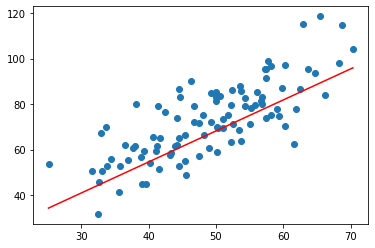

In [16]:
plt.scatter(X,y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)],color='red')
plt.show()

In [17]:
model_evaluate(y,y_pred)

The model performance
--------------------------------------
MAE is 9.675271274449019
MSE is 146.1437280915331
R2 score is 0.46802711048862267


### Conclusion:

Based on the R2 value we can say that the model trained using batch gradient descent is the best.

The run time obtained from using `%%timeit` magic function in jupyter notebook is given below
1. **Batch GD**: 842 ms ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2. **Stocastic GD**: 913 ms ± 49.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) 
3. **Mini Batch GD**: 52.2 s ± 154 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

## Q.NO 2

Write python programs to predict diabetes using logistic regression. Implement the algorithm using library and without using library. Find accuracy, precision, recall, and F1-score and compare both strategies (Use diabetes.csv). Assume train/test split is 70:30.

In [18]:
db_df = pd.read_csv('data/Diabetes.csv')

In [19]:
db_df.head()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [22]:
db_df.describe()

,Pragnency,Glucose,Blod Pressure,Skin Thikness,Insulin,BMI,DFP,Age,Diabetes
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix

In [51]:
X=db_df.drop(columns=['Diabetes']).values
y=db_df['Diabetes'].values

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Logistic Regression Using Scikit-Learn Library

In [61]:
sk_lgr = LogisticRegression()

In [62]:
sk_lgr.fit(X_train,y_train)

/home/xenon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred = sk_lgr.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       159
           1       0.66      0.51      0.58        72

    accuracy                           0.77       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231



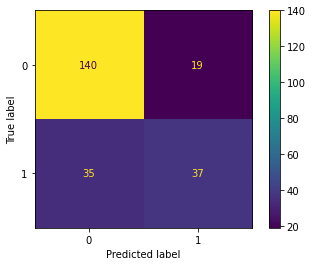

In [65]:
plot_confusion_matrix(sk_lgr,X_test,y_test)
plt.show()

### Logistic Regression From Scratch

In [66]:
# Define the sigmoid function
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [76]:
# Initializing weights and bias to zeros.
m,n=X_train.shape
w = np.zeros((n,1))
b = 0
# Reshaping y so that the dot product is possible
y_train = y_train.reshape(m,1)
epochs = 10000
lr = 0.0001
for epoch in range(epochs):
    y_hat = sigmoid(np.dot(X_train, w) + b)
    dw = (1/m)*np.dot(X_train.T, (y_hat - y_train))
    db = (1/m)*np.sum((y_hat - y_train)) 
    # Updating the weights
    w -= lr*dw
    b -= lr*db

In [77]:
preds = sigmoid(np.dot(X_test, w) + b)

In [78]:
pred_class = [1 if i > 0.5 else 0 for i in preds]

In [79]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       159
           1       0.57      0.40      0.47        72

    accuracy                           0.72       231
   macro avg       0.66      0.63      0.64       231
weighted avg       0.70      0.72      0.70       231



### Conclusion

The accuracy of Scikit Learn is 77% and model implemented from scratch is 72%. 